In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, LeaveOneOut,StratifiedKFold
import random

In [2]:
# Chargement du jeu de données
palu=pd.read_excel('C:\\Users\\ASUS\\Documents\\these\\code_these-master\\palu_impute001.xlsx')
# Chargement du jeu de données
palu1=pd.read_excel('C:\\Users\\ASUS\\Documents\\these\\code_these-master\\MORBIDITE.xls')

# Selection des features du paludisme
paluu=pd.DataFrame(palu, columns = [  'S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI',
                                    'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 
                                    'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE','Diagnostic'])


# Selection des features du paludisme
paluu1=pd.DataFrame(palu1, columns = [  'S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI',
                                    'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 
                                    'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE','Diagnostic'])



In [3]:
palu1.shape

(16092, 15)

(array([6869.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9223.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

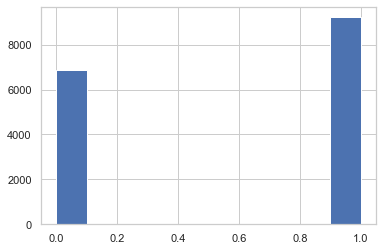

In [4]:
plt.hist(palu1['Diagnostic'])

In [5]:
palu['Diagnostic'].value_counts()

0    20469
1      614
Name: Diagnostic, dtype: int64

(array([6869.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9223.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

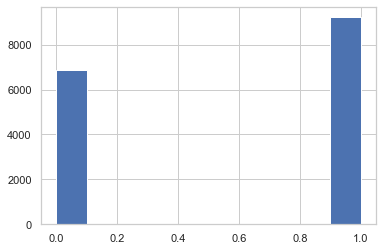

In [6]:
plt.hist(palu1['Diagnostic'])

1    9223
0    6869
Name: Diagnostic, dtype: int64
(20469, 13)
(2354, 13)


(18446, 13)

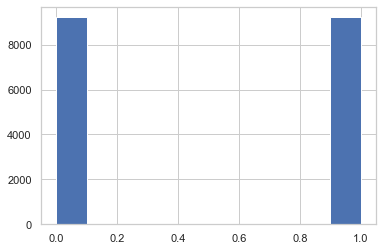

In [7]:
print(palu1['Diagnostic'].value_counts())
paluu_negatif=paluu[paluu['Diagnostic']==0]
print(paluu_negatif.shape)

paluu_sample=paluu_negatif.sample(2354)
print(paluu_sample.shape)
palu2=paluu1.append(paluu_sample)
plt.hist(palu2['Diagnostic'])
palu2.shape

In [8]:
# Selection des features du paludisme
X=palu2.iloc[:,0:12]       

#X=pd.DataFrame(palu2, columns = [  'TEMPERATURE', 'S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI',
                                    #'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 
                                    #'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE'])
y = palu2['Diagnostic']
X1_train, MX_test, y1_train, My_test = train_test_split(X, y,test_size=0.2 ,random_state=0)

In [9]:
#import pandas_profiling as pp
#pp.ProfileReport(palu2)

In [10]:
# Les differentes methodes pour faire une validation croisée(Cross Validation)
cv=KFold(5,random_state=0)
cv1= LeaveOneOut()
cv2=StratifiedKFold(5)  

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Chercher les meilleurs paramètres du modele
param_grid={'max_depth': np.arange(12,20), 'criterion':['gini','entropy']}
grid=GridSearchCV( DecisionTreeClassifier(),param_grid, cv=cv2)
grid.fit(X1_train,y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([12, 13, 14, 15, 16, 17, 18, 19])})

In [18]:
#Afficher le meilleur score
print('best score',grid.best_score_)
# Afficher les meilleurs parametres
print('best score',grid.best_params_)
# Recuperer le meilleur modele fourni 
model=grid.best_estimator_
print('best score',model.score(MX_test,My_test))

best score 0.6446184702443432
best score {'criterion': 'entropy', 'max_depth': 12}
best score 0.6560975609756098


In [19]:
# Afficher la matrice de confusion
print(confusion_matrix(My_test, model.predict(MX_test)))  
# Afficher le rapport de la classification
print(classification_report(My_test,model.predict(MX_test)))

[[1049  765]
 [ 504 1372]]
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1814
           1       0.64      0.73      0.68      1876

    accuracy                           0.66      3690
   macro avg       0.66      0.65      0.65      3690
weighted avg       0.66      0.66      0.65      3690



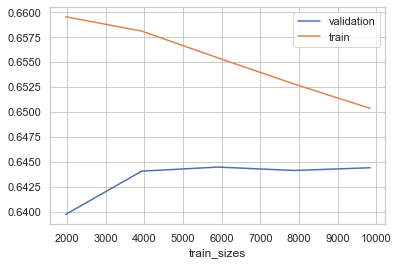

In [20]:
# Tracer les courbes d'apprentissages: Veci permet de verifier s'il y a surapprentissage ou apprentissage
N, train_score, val_score=learning_curve(model, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=3)
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

0.7018470707574115


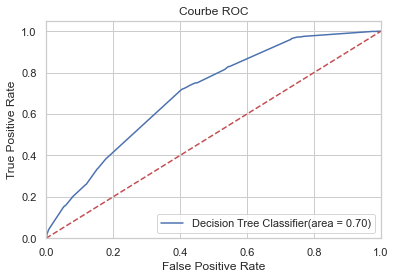

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model.predict_proba(MX_test)[:,1]
# Calculer l'air sous la courbe
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
# Tracer la courbe roc
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression

best score 0.6454996652643585
best score {'max_iter': 10, 'solver': 'newton-cg'}
best score 0.6582655826558266
[[1070  744]
 [ 517 1359]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63      1814
           1       0.65      0.72      0.68      1876

    accuracy                           0.66      3690
   macro avg       0.66      0.66      0.66      3690
weighted avg       0.66      0.66      0.66      3690

0.6934613924392842


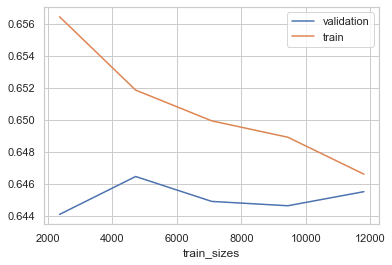

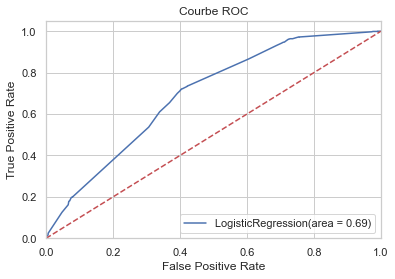

In [22]:
from sklearn.linear_model import LogisticRegression
rf= LogisticRegression()
from sklearn.linear_model import LogisticRegression
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[10, 100,500,1000, 2000, 3000,4000]}
grid2=GridSearchCV( LogisticRegression(),param_grid, cv=StratifiedKFold(5)  )
grid2.fit(X1_train,y1_train)
print('best score',grid2.best_score_)
print('best score',grid2.best_params_)
model2=grid2.best_estimator_
print('best score',model2.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model2, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=StratifiedKFold(5)  )
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()
print(confusion_matrix(My_test, model2.predict(MX_test)))  
print(classification_report(My_test,model2.predict(MX_test)))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model2.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='LogisticRegression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# NAIVES BAYES ALGORITHM

best score 0.6453637965725643
best score {'var_smoothing': 0.6}
best score 0.6598915989159891
[[1074  740]
 [ 515 1361]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1814
           1       0.65      0.73      0.68      1876

    accuracy                           0.66      3690
   macro avg       0.66      0.66      0.66      3690
weighted avg       0.66      0.66      0.66      3690

0.6983455203898604


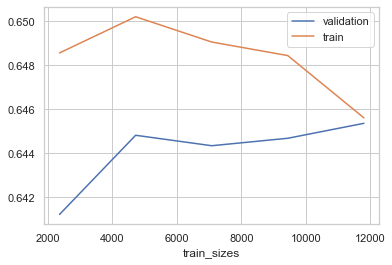

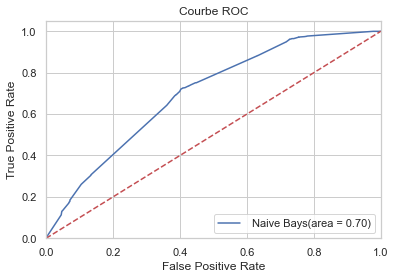

In [23]:
from sklearn.naive_bayes import GaussianNB  
param_grid={'var_smoothing': np.linspace(0.1,1,10)}
grid3=GridSearchCV( GaussianNB(),param_grid, cv=StratifiedKFold(5)  )
grid3.fit(X1_train,y1_train)


print('best score',grid3.best_score_)
print('best score',grid3.best_params_)
model3=grid3.best_estimator_
print('best score',model3.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model3, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

print(confusion_matrix(My_test, model3.predict(MX_test)))  
print(classification_report(My_test,model3.predict(MX_test)))


y_pred=model3.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=' Naive Bays(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# SVM avec kernel

best score 0.6428565852923864
best score {'kernel': 'rbf'}
best score 0.6563685636856369
              precision    recall  f1-score   support

           0       0.68      0.58      0.62      1814
           1       0.64      0.73      0.68      1876

    accuracy                           0.66      3690
   macro avg       0.66      0.66      0.65      3690
weighted avg       0.66      0.66      0.65      3690

0.6875852173218018


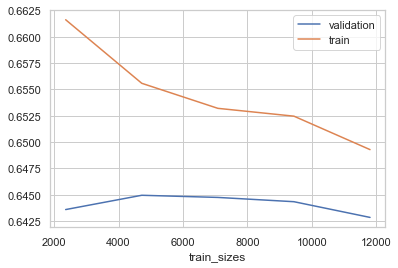

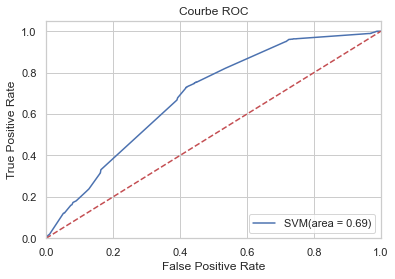

In [24]:
from sklearn.svm import SVC  
param_grid={'kernel':['rbf','linear','sigmoid']}
grid4=GridSearchCV(SVC(probability=True),param_grid, cv=cv2)
grid4.fit(X1_train,y1_train)
print('best score',grid4.best_score_)
print('best score',grid4.best_params_)
model4=grid4.best_estimator_
print('best score',model4.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model4, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

# print(confusion_matrix(My_test, model4.predict(MX_test)))  
print(classification_report(My_test,model4.predict(MX_test)))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model4.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


best score 0.6451606822913367
best score {'criterion': 'entropy', 'max_depth': 16, 'n_estimators': 10}
best score 0.6555555555555556
[[1024  790]
 [ 481 1395]]
              precision    recall  f1-score   support

           0       0.68      0.56      0.62      1814
           1       0.64      0.74      0.69      1876

    accuracy                           0.66      3690
   macro avg       0.66      0.65      0.65      3690
weighted avg       0.66      0.66      0.65      3690

0.7014674128961431


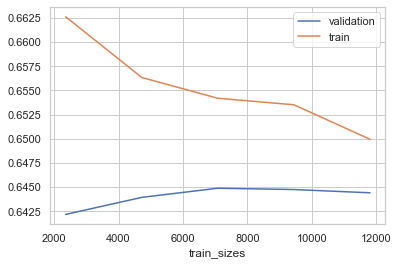

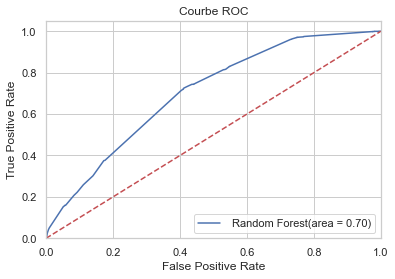

In [25]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth': np.arange(14,20), 'criterion':['gini','entropy'],'n_estimators':[10,50,100, 150, 200,250]}
grid3=GridSearchCV( RandomForestClassifier(),param_grid, cv=cv2)
grid3.fit(X1_train,y1_train)

print('best score',grid3.best_score_)
print('best score',grid3.best_params_)
model3=grid3.best_estimator_
print('best score',model3.score(MX_test,My_test))
N, train_score, val_score=learning_curve(model3, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

print(confusion_matrix(My_test, model3.predict(MX_test)))  
print(classification_report(My_test,model3.predict(MX_test)))


y_pred=model3.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label=' Random Forest(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

best score 0.647396707193097
best score {'max_iter': 100}
best score 0.6574525745257452
[[1020  794]
 [ 470 1406]]
              precision    recall  f1-score   support

           0       0.68      0.56      0.62      1814
           1       0.64      0.75      0.69      1876

    accuracy                           0.66      3690
   macro avg       0.66      0.66      0.65      3690
weighted avg       0.66      0.66      0.65      3690

0.7029867789733018


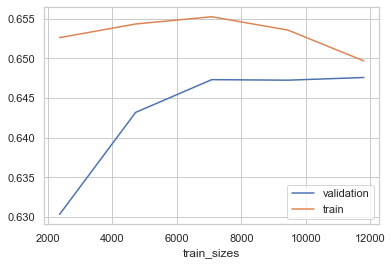

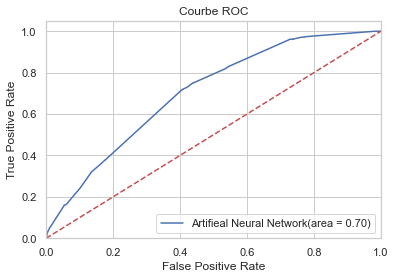

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import random
random.seed(1000)
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(MX_test)


param_grid={'max_iter':[10,50,100, 200, 300,400]}
grid5=GridSearchCV(MLPClassifier(hidden_layer_sizes=(12,12,2)),param_grid, cv=cv2)
grid5.fit(X1_train,y1_train)
print('best score',grid5.best_score_)
print('best score',grid5.best_params_)
model5=grid5.best_estimator_
print('best score',model5.score(X1_test,My_test))

N, train_score, val_score=learning_curve(model5, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()


print(confusion_matrix(My_test, model5.predict(X1_test)))  
print(classification_report(My_test,model5.predict(X1_test)))



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model5.predict_proba(X1_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Artifieal Neural Network(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()